#**Import Library**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#**Data Loading**

In [3]:
import pandas as pd
file_id = '1JoWIm3IclKKBPlV4jwpmpsn35uc4zRXW'
download_url = f'https://drive.google.com/uc?id={file_id}'
df_train = pd.read_csv(download_url)
df_train.head()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,0,5,8,5,8,6,4,4,3,3,...,5,3,3,5,4,7,5,7,3,0.445
1,1,6,7,4,4,8,8,3,5,4,...,7,2,0,3,5,3,3,4,3,0.450
2,2,6,5,6,7,3,7,1,5,4,...,7,3,7,5,6,8,2,3,3,0.530
3,3,3,4,6,5,4,8,4,7,6,...,2,4,7,4,4,6,5,7,5,0.535
4,4,5,3,2,6,4,4,3,3,3,...,2,2,6,6,4,1,2,3,5,0.415


#**Data Cleaning and Transformation**

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1117957 entries, 0 to 1117956
Data columns (total 22 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   id                               1117957 non-null  int64  
 1   MonsoonIntensity                 1117957 non-null  int64  
 2   TopographyDrainage               1117957 non-null  int64  
 3   RiverManagement                  1117957 non-null  int64  
 4   Deforestation                    1117957 non-null  int64  
 5   Urbanization                     1117957 non-null  int64  
 6   ClimateChange                    1117957 non-null  int64  
 7   DamsQuality                      1117957 non-null  int64  
 8   Siltation                        1117957 non-null  int64  
 9   AgriculturalPractices            1117957 non-null  int64  
 10  Encroachments                    1117957 non-null  int64  
 11  IneffectiveDisasterPreparedness  1117957 non-null 

In [6]:
df_train.describe(include='all')

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
count,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,...,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06
mean,5.589780e+05,4.921450e+00,4.926671e+00,4.955322e+00,4.942240e+00,4.942517e+00,4.934093e+00,4.955878e+00,4.927791e+00,4.942619e+00,...,4.946893e+00,4.953999e+00,4.931376e+00,4.929032e+00,4.925907e+00,4.927520e+00,4.950859e+00,4.940587e+00,4.939004e+00,5.044803e-01
std,3.227265e+05,2.056387e+00,2.093879e+00,2.072186e+00,2.051689e+00,2.083391e+00,2.057742e+00,2.083063e+00,2.065992e+00,2.068545e+00,...,2.072333e+00,2.088899e+00,2.078287e+00,2.082395e+00,2.064813e+00,2.074176e+00,2.068696e+00,2.081123e+00,2.090350e+00,5.102610e-02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.850000e-01
25%,2.794890e+05,3.000000e+00,3.000000e+00,4.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,...,4.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,4.700000e-01
50%,5.589780e+05,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,...,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.050000e-01
75%,8.384670e+05,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,...,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,5.400000e-01
max,1.117956e+06,1.600000e+01,1.800000e+01,1.600000e+01,1.700000e+01,1.700000e+01,1.700000e+01,1.600000e+01,1.600000e+01,1.600000e+01,...,1.700000e+01,1.700000e+01,1.600000e+01,1.600000e+01,1.700000e+01,1.800000e+01,1.900000e+01,1.600000e+01,1.600000e+01,7.250000e-01


In [34]:
# remove unused feature
df_train.drop(['id'], axis=1, inplace=True)
df_train.head()

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,5,8,5,8,6,4,4,3,3,4,...,5,3,3,5,4,7,5,7,3,0.445
1,6,7,4,4,8,8,3,5,4,6,...,7,2,0,3,5,3,3,4,3,0.450
2,6,5,6,7,3,7,1,5,4,5,...,7,3,7,5,6,8,2,3,3,0.530
3,3,4,6,5,4,8,4,7,6,8,...,2,4,7,4,4,6,5,7,5,0.535
4,5,3,2,6,4,4,3,3,3,3,...,2,2,6,6,4,1,2,3,5,0.415


In [35]:
# check missing values
missing_values = df_train.isnull().sum()
missing_values[missing_values>0]

,0


###**Handling Outliers**

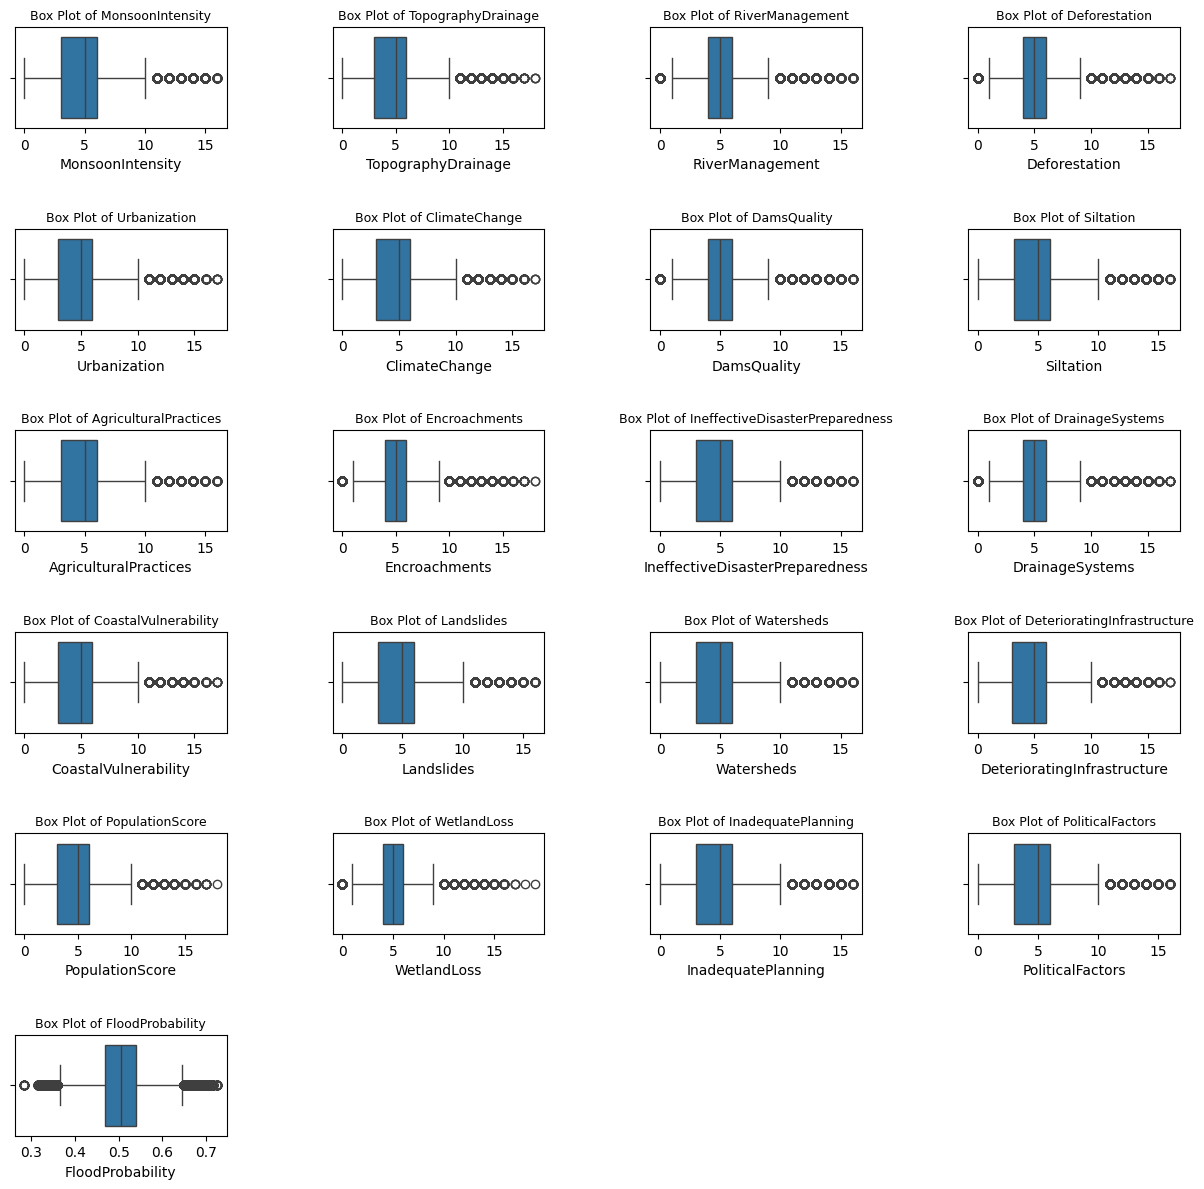

In [36]:
# Check for outliers with boxplots in grid layout
import math
import matplotlib.pyplot as plt
import seaborn as sns

# count features length
features = df_train.columns
n_features = len(features)

# define the number of columns in the grid
n_cols = 4
n_rows = math.ceil(n_features / n_cols) # calculate the number of rows needed based on the total number of features

# create a figure and a set of subplot
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 2 * n_rows))
axes = axes.flatten()  # flatten the 2D array of axes

# loop through each feature and create a boxplot
for i, feature in enumerate(features):
    sns.boxplot(x=df_train[feature], ax=axes[i])
    axes[i].set_title(f'Box Plot of {feature}', fontsize=9)

# delete unused plot
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.subplots_adjust(wspace=0.5, hspace=1)
plt.show()

The boxplot reveal that several features in the dataset contain **a significant number of outliers**. This is indicated by many data points lying outside the whisker of the boxes, especially on the upper or lower ends.

**Possible handling strategies:**
*   Remove them if they are due to errors
* Cap/clip extreme values (e.g., using IQR-based limits)
* Use models that are robust to outliers (e.g., tree-based models)

in this case, we choose to remove the outliers, assuming they are the result of human error rather than meaningful extreme values. We also assume that their removal will not significantly impact the descriptive analysis or the overall data trends.



In [37]:
# Calculate the first (Q1) and third (Q3) quartiles for each feature
Q1 = df_train.quantile(0.25)
Q3 = df_train.quantile(0.75)

# Compute the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define a condition that keeps only rows where all feature values are within the IQR bounds
# Any row that has at least one feature value outside the [Q1 - 1.5*IQR, Q3 + 1.5*IQR] range is considered to contain an outlier
condition = ~((df_train < (Q1 - 1.5 * IQR)) | (df_train > (Q3 + 1.5 * IQR))).any(axis=1)

# Apply the condition to filter out the outliers
df = df_train.loc[condition, df_train.columns]

In [38]:
# Show the number of rows before and after removing outliers
print("Original dataset shape:", df_train.shape)
print("After outlier removal:", df.shape)
print("Total rows removed:", df_train.shape[0] - df.shape[0])
removed_percentage = ((df_train.shape[0] - df.shape[0]) / df_train.shape[0]) * 100
print(f"Percentage of data removed: {removed_percentage:.2f}%")

Original dataset shape: (1117957, 21)
After outlier removal: (845886, 21)
Total rows removed: 272071
Percentage of data removed: 24.34%


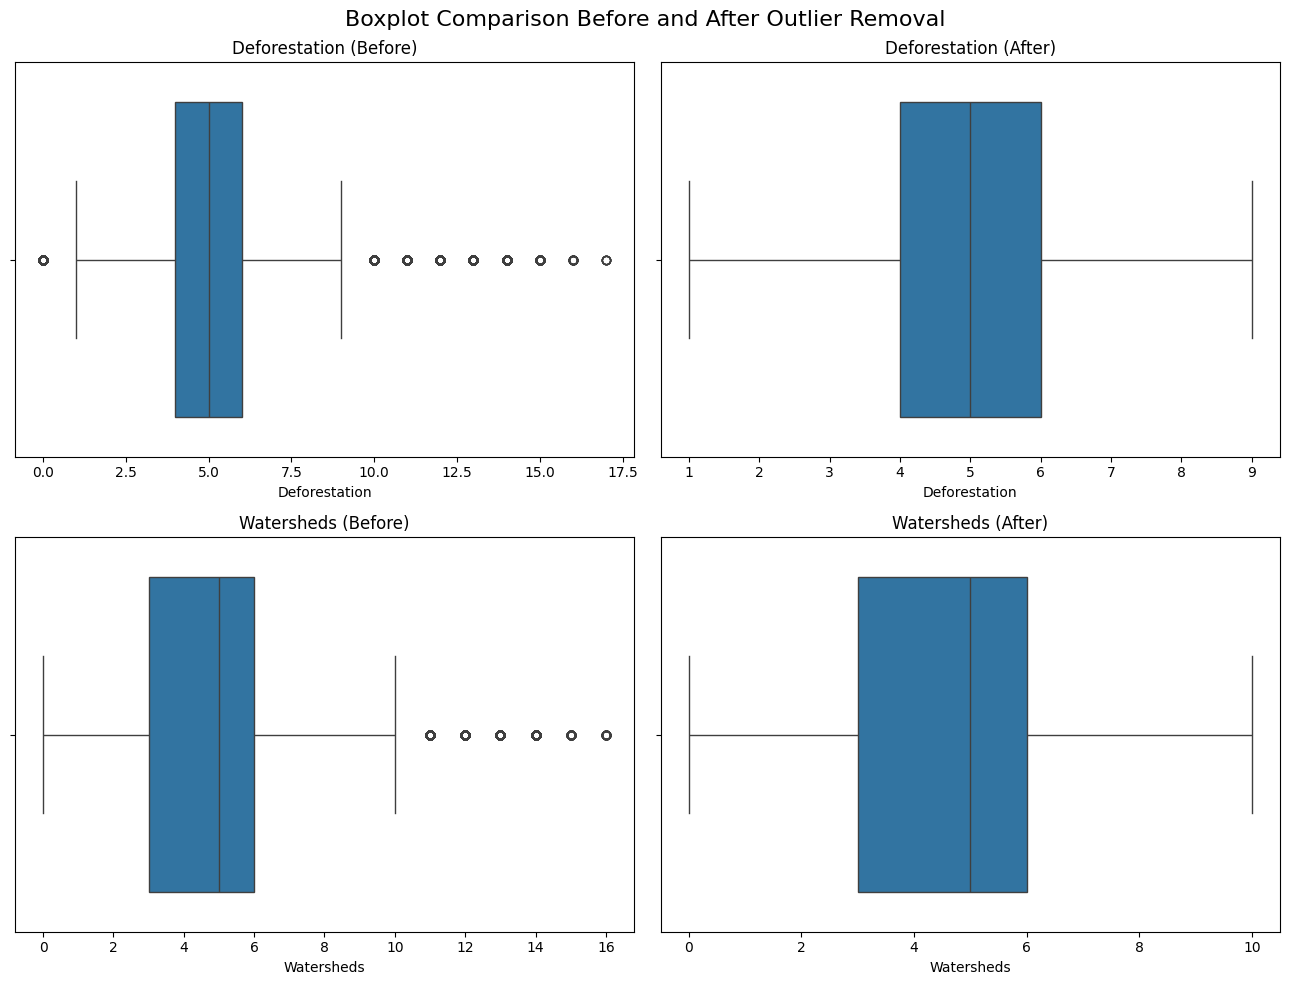

In [39]:
# visualize data before and after outliers handling
fig, axes = plt.subplots(2, 2, figsize=(13, 10))
fig.suptitle('Boxplot Comparison Before and After Outlier Removal', fontsize=16)

sns.boxplot(x=df_train['Deforestation'], ax=axes[0, 0])
axes[0, 0].set_title('Deforestation (Before)')

sns.boxplot(x=df['Deforestation'], ax=axes[0, 1])
axes[0, 1].set_title('Deforestation (After)')

sns.boxplot(x=df_train['Watersheds'], ax=axes[1, 0])
axes[1, 0].set_title('Watersheds (Before)')

sns.boxplot(x=df['Watersheds'], ax=axes[1, 1])
axes[1, 1].set_title('Watersheds (After)')

plt.tight_layout()
plt.show()

These boxplots compare the features before and after handling outliers. The 'after' plots clearly show that no data points lie outside the whiskers, which means that the outliers have been successfully removed

###**Standardization**

The initial analysis revealed issues with the data, such as inconsistent distributions, large standard deviations, and varying ranges across different features. To resolve this and optimize the data for future model training, standardization is the necessary next step. Since all features in the dataset are already numerical, no data type transformations are required, and we can proceed directly by using the StandardScaler library

In [40]:
from sklearn.preprocessing import StandardScaler

# ensure only numerical features selected
numeric_features = df.select_dtypes(include=['number']).columns
numeric_features

# numerical features standardization
scaler = StandardScaler()
df[numeric_features] = scaler.fit_transform(df[numeric_features])

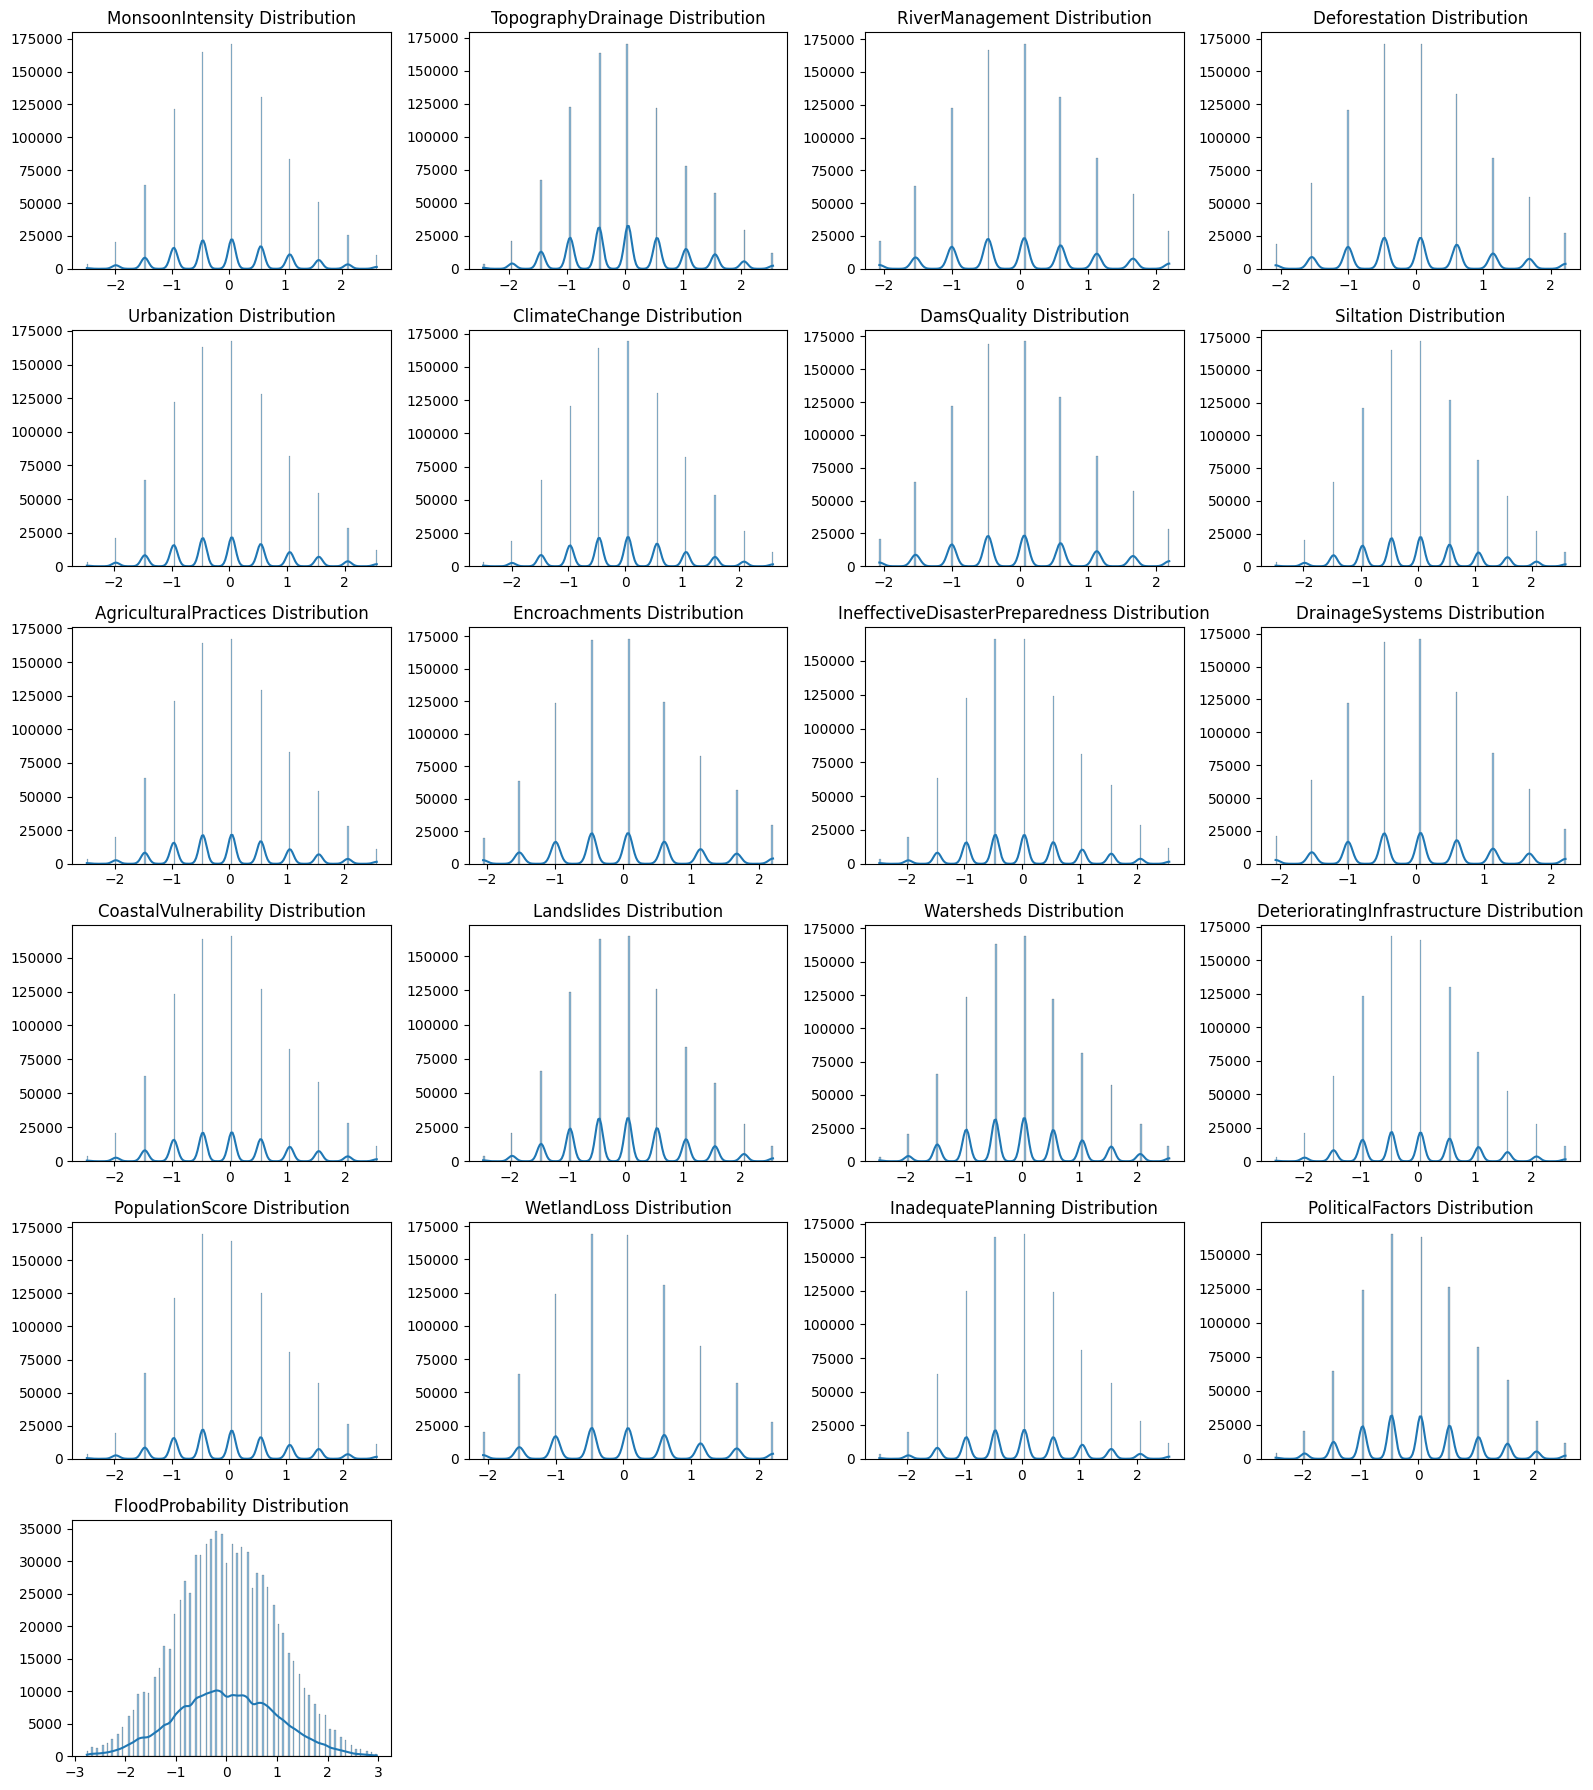

In [42]:
n_features = len(numeric_features)

n_cols = 4
n_rows = math.ceil(n_features / n_cols)

# Buat figure dan set subplot
fig, axes = plt.subplots(n_rows, n_cols, figsize=(4 * n_cols, 3 * n_rows))
axes = axes.flatten()

for i, feature in enumerate(numeric_features):
    sns.histplot(data=df, x=feature, kde=True, ax=axes[i])
    axes[i].set_title(f'{feature} Distribution', fontsize=12)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

# delete unused plot
for j in range(n_features, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [43]:
# checking duplicated data
duplicates = df.duplicated()
df[duplicates]

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability


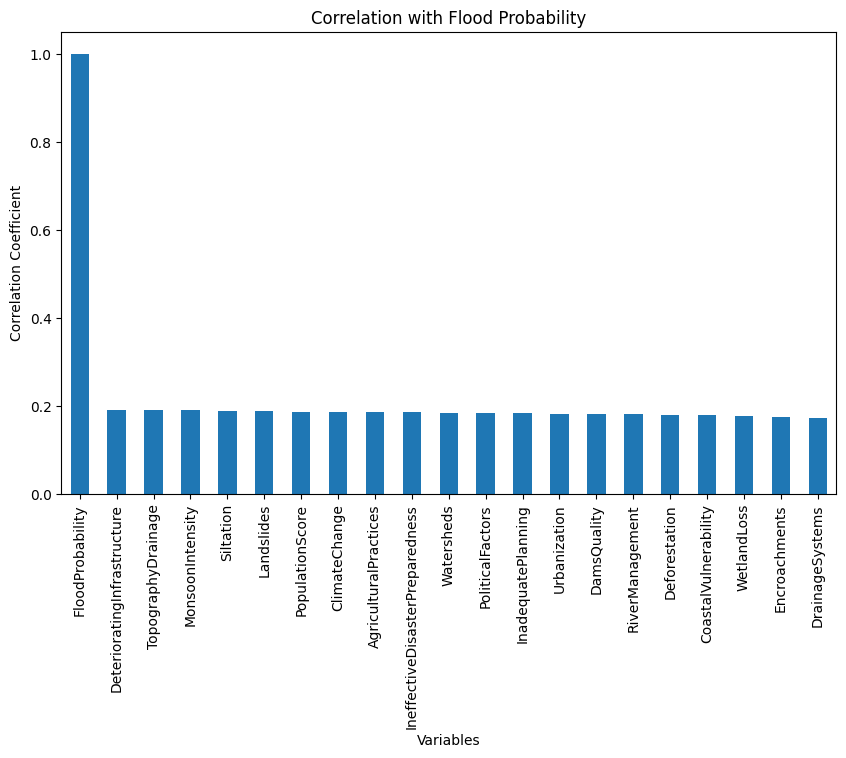

In [44]:
# calculate correlation between the target variable and all other variables
target_corr = df.corr()['FloodProbability']

# sort the correlation results based on correlation strength
target_corr_sorted = target_corr.abs().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
target_corr_sorted.plot(kind='bar')
plt.title(f'Correlation with Flood Probability')
plt.xlabel('Variables')
plt.ylabel('Correlation Coefficient')
plt.show()

Since there is a relationship between all the features and the target variable, there is no need to remove any features. Therefore, the dataset is ready to proceed to the next step, which is splitting the data

#**Data Splitting**

In [46]:
import sklearn
from sklearn import datasets

# separate features (X) and target (y)
X = df.drop(columns=['FloodProbability'])
y = df['FloodProbability']

from sklearn.model_selection import train_test_split

# split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

#print the shape of training and test sets to verivy the result
print(f"Training set shape: X_train= {x_train.shape}, y_train= {y_train.shape}")
print(f"Test set shape: X_test= {x_test.shape}, y_test= {y_test.shape}")
print("Total number of samples: ", len(X))
print("Number of training samples: ", len(x_train))
print("Number of testing samples: ", len(x_test))

Training set shape: X_train= (676708, 20), y_train= (676708,)
Test set shape: X_test= (169178, 20), y_test= (169178,)
Total number of samples:  845886
Number of training samples:  676708
Number of testing samples:  169178


#**Model Deployment**

In [48]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor

lars = linear_model.Lars(n_nonzero_coefs=1).fit(x_train, y_train)
LR = LinearRegression().fit(x_train, y_train)
GBR = GradientBoostingRegressor(random_state=184)
GBR.fit(x_train, y_train)

pred_lars = lars.predict(x_test)
pred_LR = LR.predict(x_test)
pred_GBR = GBR.predict(x_test)

#**Model Evaluation**

###**Least Angle Regression (LARS)**

In [49]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae_lars = mean_absolute_error(y_test, pred_lars)
mse_lars = mean_squared_error(y_test, pred_lars)
r2_lars = r2_score(y_test, pred_lars)

print(f"MAE: {mae_lars}")
print(f"MSE: {mse_lars}")
print(f"R²: {r2_lars}")

MAE: 0.8064965862112844
MSE: 0.9982455301765661
R²: 0.0007638833508322174


###**Linear Regression (LR)**

In [50]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae_LR = mean_absolute_error(y_test, pred_LR)
mse_LR = mean_squared_error(y_test, pred_LR)
r2_LR = r2_score(y_test, pred_LR)

print(f"MAE: {mae_LR}")
print(f"MSE: {mse_LR}")
print(f"R²: {r2_LR}")

MAE: 0.3291416529981243
MSE: 0.1712951124823055
R²: 0.8285349066701793


###**Gradient Boosting Regressor (GBR)**

In [51]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae_GBR = mean_absolute_error(y_test, pred_GBR)
mse_GBR = mean_squared_error(y_test, pred_GBR)
r2_GBR = r2_score(y_test, pred_GBR)

print(f"MAE: {mae_GBR}")
print(f"MSE: {mse_GBR}")
print(f"R²: {r2_GBR}")

MAE: 0.5126715936448324
MSE: 0.3804907514322631
R²: 0.6191316771387397


#**Model Evaluation Summary and Analysis**

In [52]:
# Create a DataFrame with evaluation results for all models
df_results = pd.DataFrame({
    'MAE': [mae_lars, mae_LR, mae_GBR],
    'MSE': [mse_lars, mse_LR, mse_GBR],
    'R2': [r2_lars, r2_LR, r2_GBR]
}, index=['Lars', 'Linear Regression', 'GradientBoostingRegressor'])

df_results

,MAE,MSE,R2
Lars,0.806497,0.998246,0.000764
Linear Regression,0.329142,0.171295,0.828535
GradientBoostingRegressor,0.512672,0.380491,0.619132


From the evaluation results, Linear Regression clearly outperforms both LARS and GradientBoostingRegressor on this datasets.

* **Mean Absolute Error (MAE)**:

  Linear Regression achieves the lowest MAE of 0.329, which means on average, its predictions deviate from the actual values by about 0.33 units. In comparison, Gradient Boosting has an MAE of 0.513 (approximately 56% higher), and LARS has the highest MAE of 0.806 (about 145% higher than Linear Regression)

* **Mean Squared Error (MSE)**:

  Linear Regression also has the lowest MSE at 0.171, indicating that the squared prediction errors are smaller on average. Gradient Boosting’s MSE is 0.380, which is over twice as large as Linear Regression’s, and LARS has the largest MSE of 0.998, almost six times higher than Linear Regression

* **R-Squared (R²)**:

  The R² value for Linear Regression is 0.829, meaning it explains about 82.9% of the variance in the target variable. Gradient Boosting explains around 61.9% of the variance, while LARS barely explains any variance at 0.00076, suggesting it’s almost no better than a simple mean prediction
---

**Summary**

These results suggest that the relationship between the features and the target variable is likely linear or close to linear, making Linear Regression the most suitable model in this case. Gradient Boosting, despite being a more complex, non-linear model, underperforms compared to Linear Regression, likely due to overfitting or the simplicity of the underlying pattern. LARS, which aggressively limits features, performs worst, possibly because it only uses one feature and cannot capture enough information